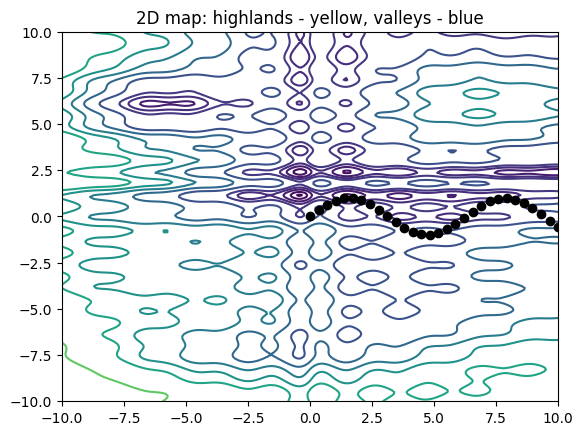

In [10]:
"""
 2-D function drawing with points

"""
import numpy as np
import math
import matplotlib.pyplot as plt

def fun3(x1,x2):
    eps = 0.00000001
    R1 = np.sqrt(0.3*(x1+3)**2 + (x2+4)**2 + eps)
    R2 = np.sqrt(0.2*(x1-7)**2 + (x2-6)**2 + eps)
    R3 = np.sqrt(0.2*(x1-7)**2 + 0.5*(x2-6)**2 + eps)
    R4 = np.sqrt(0.7*(x1+7)**2 + 2*(x2-6)**2 + eps)
    R5 = np.sqrt(0.2*(x1+3)**2 + 0.05*(x2+5)**4 + eps)

    y = np.sin(x1*3)/(abs(x1)+1) + np.sin(x2*5-1)/(abs(x2/2-1)+1) + ((x1-5)**2+(x2-5)**2)/50 + \
        4*np.sin(R1)/R1 + 4*np.sin(R2)/R2 - 3*np.sin(R4)/R4 - 3*np.sin(R5)/R5
    return y

def draw_map():
    X1, X2 = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
    Z = fun3(X1,X2)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    cs = plt.contour(X1,X2,Z, levels=[-2.0, -1.8, -1.5, -1, -0.5, 0, 1, 2, 3, 4, 5,7,10])
    #fig,ax = plt.subplots()
    #CS = ax.contour(X1,X2,Z, levels=[-2.0, -1.8, -1.5, -1, -0.5, 0, 1, 2, 3, 4, 5,7,10])
    #ax.clabel(CS, inline=True, fontsize=10)

def show_fun():

    draw_map()
    x = np.linspace(0, 10, 30)
    y = np.sin(x)
    plt.plot(x, y, 'o', color='black');
    plt.title('2D map: highlands - yellow, valleys - blue')
    plt.show()

def show_point_sequence(Points,title):
    draw_map()
    plt.plot(Points[:,0], Points[:,1], '', color='blue');
    plt.plot(Points[:,0], Points[:,1], 'o', color='blue',markersize=12,linewidth=2);
    plt.plot(Points[-1,0], Points[-1, 1], '+', color='red', markersize=20, linewidth=3);
    plt.title(title)
    plt.show()

def show_the_point(x,title):
    draw_map()
    plt.plot(x[0], x[1], '+', color='red', markersize=12, linewidth=2);
    plt.title(title)
    plt.show()


show_fun()


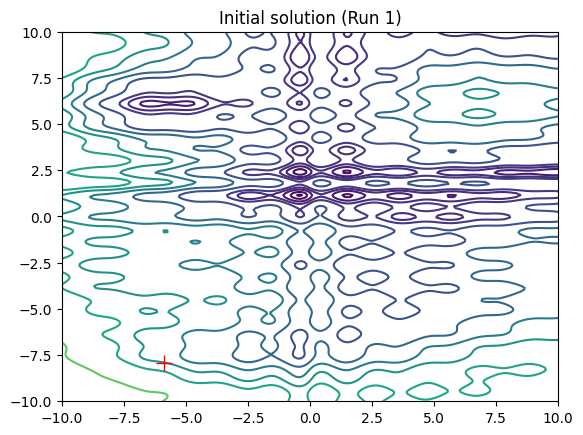

New minimum = 490.042985 at x1 = -6.780218, x2 = 161.106638
New minimum = 376.778844 at x1 = 74.371511, x2 = -113.445563
New minimum = 104.854111 at x1 = -22.985512, x2 = 71.778212
New minimum = 64.728133 at x1 = -2.950931, x2 = -51.371113
New minimum = 56.767460 at x1 = 22.288630, x2 = 55.440605
New minimum = 23.637910 at x1 = 36.810929, x2 = 18.298882
New minimum = 9.581884 at x1 = 22.156815, x2 = -7.699178
New minimum = 6.006434 at x1 = 17.330970, x2 = -7.563742
New minimum = 2.857407 at x1 = 14.312406, x2 = 11.987630
New minimum = 2.023466 at x1 = -4.865224, x2 = -0.210380
New minimum = 0.971357 at x1 = -2.002951, x2 = 1.609977
New minimum = -1.104134 at x1 = 9.027659, x2 = 2.435569
New minimum = -1.305447 at x1 = 9.687130, x2 = 2.391113
Best solution, value = -1.305447 at x1 = 9.687130, x2 = 2.391113


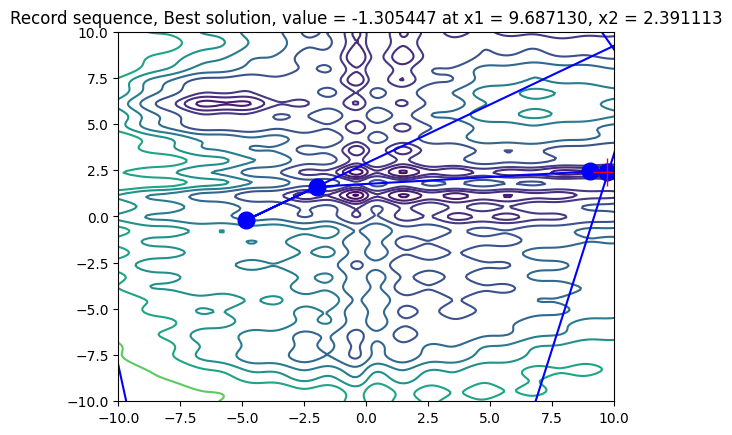

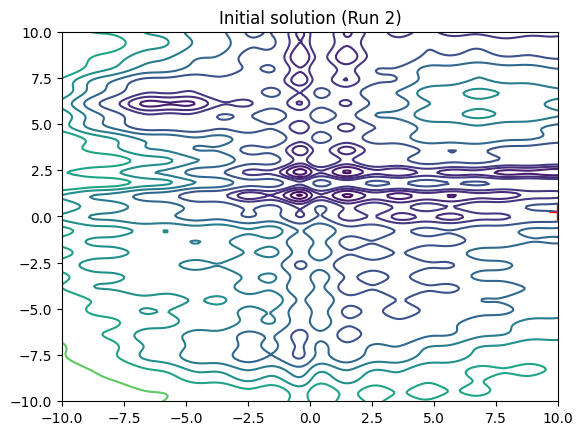

New minimum = 687.591412 at x1 = 57.011891, x2 = -172.971487
New minimum = 18.385606 at x1 = 29.189491, x2 = -13.097157
New minimum = 4.110668 at x1 = 17.138218, x2 = -5.132570
New minimum = 2.941275 at x1 = 0.722008, x2 = 15.424239
New minimum = 1.782909 at x1 = 4.883446, x2 = -5.711175
New minimum = 1.508489 at x1 = 2.367909, x2 = -6.648603
New minimum = 0.938853 at x1 = 3.032341, x2 = 1.920592
New minimum = 0.004015 at x1 = 3.472303, x2 = 9.703700
New minimum = -0.057319 at x1 = -1.547046, x2 = 2.297891
New minimum = -0.913846 at x1 = 3.092714, x2 = 1.011132
Best solution, value = -0.913846 at x1 = 3.092714, x2 = 1.011132


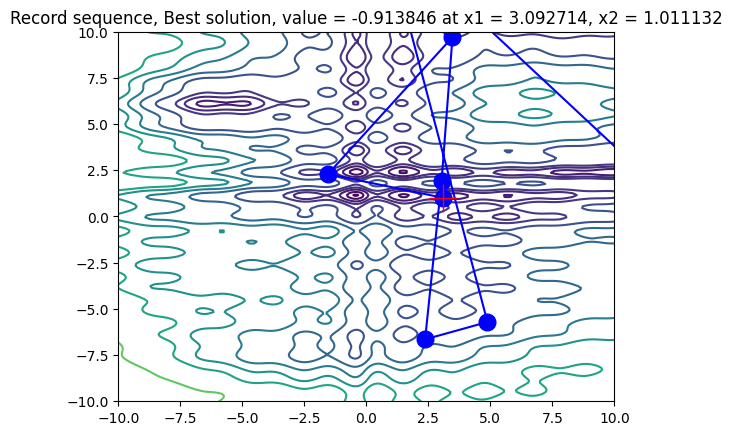

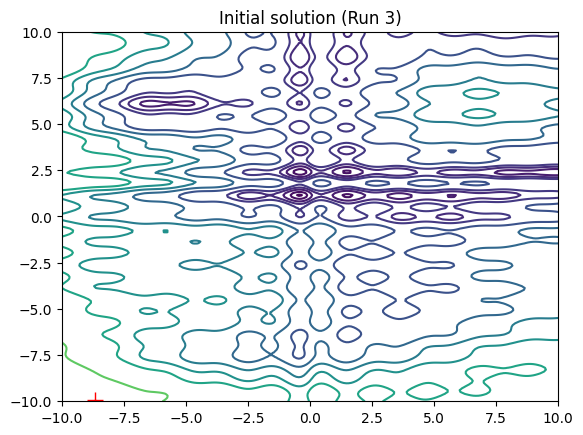

New minimum = 2223.495902 at x1 = 226.733734, x2 = 254.016113
New minimum = 1099.570576 at x1 = -216.393577, x2 = -72.210668
New minimum = 80.410538 at x1 = -38.349387, x2 = 51.299001
New minimum = 73.267865 at x1 = 48.062103, x2 = -37.595245
New minimum = 58.265600 at x1 = -22.635190, x2 = -41.316544
New minimum = 29.991000 at x1 = 27.813516, x2 = 36.335609
New minimum = 1.841828 at x1 = 1.034739, x2 = -4.593460
New minimum = 0.879500 at x1 = 3.262753, x2 = -1.021542
New minimum = 0.243772 at x1 = 1.128334, x2 = 0.481600
New minimum = -1.265739 at x1 = 9.690213, x2 = 2.333885
Best solution, value = -1.265739 at x1 = 9.690213, x2 = 2.333885


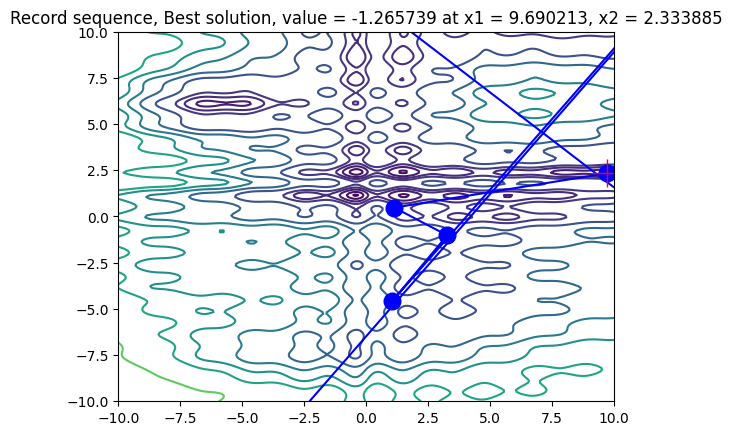

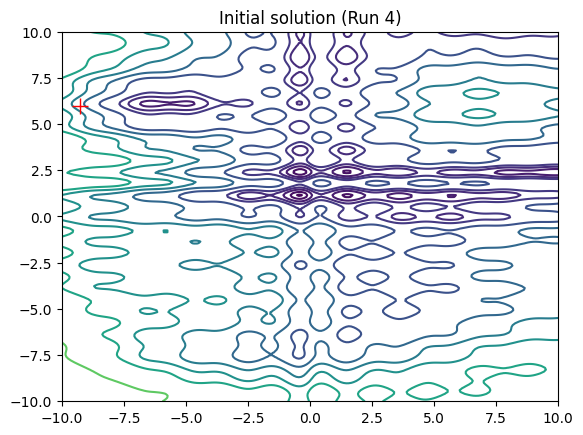

New minimum = 21.928898 at x1 = 17.415730, x2 = 35.776180
New minimum = 16.675413 at x1 = 33.991842, x2 = 7.113291
New minimum = 0.527109 at x1 = -3.009849, x2 = 5.733758
New minimum = -0.439989 at x1 = -0.081651, x2 = 3.661969
New minimum = -0.563243 at x1 = 6.063519, x2 = 2.515352
New minimum = -1.057994 at x1 = 8.620086, x2 = 2.457277
New minimum = -1.528499 at x1 = 1.365050, x2 = 1.094462
Best solution, value = -1.528499 at x1 = 1.365050, x2 = 1.094462


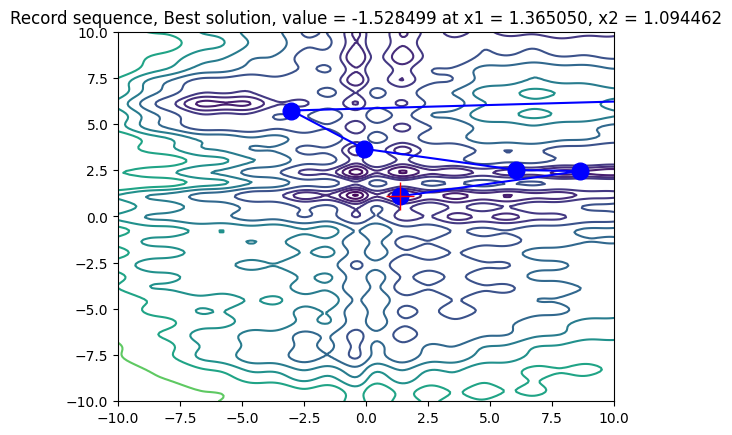

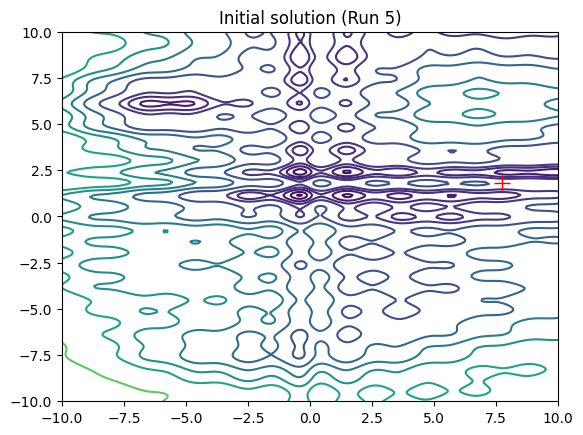

New minimum = 797.558113 at x1 = 185.436773, x2 = -80.577648
New minimum = 370.293164 at x1 = -120.996626, x2 = 56.356782
New minimum = 120.412042 at x1 = -24.628043, x2 = -66.707331
New minimum = 27.636831 at x1 = -15.396608, x2 = 36.028926
New minimum = 13.335017 at x1 = -12.146074, x2 = 24.129836
New minimum = 8.179965 at x1 = 24.130205, x2 = 13.704087
New minimum = 1.033618 at x1 = 12.622725, x2 = 9.370313
New minimum = -0.444754 at x1 = 7.514675, x2 = 10.043535
New minimum = -1.678991 at x1 = -0.407270, x2 = 2.480230
Best solution, value = -1.678991 at x1 = -0.407270, x2 = 2.480230


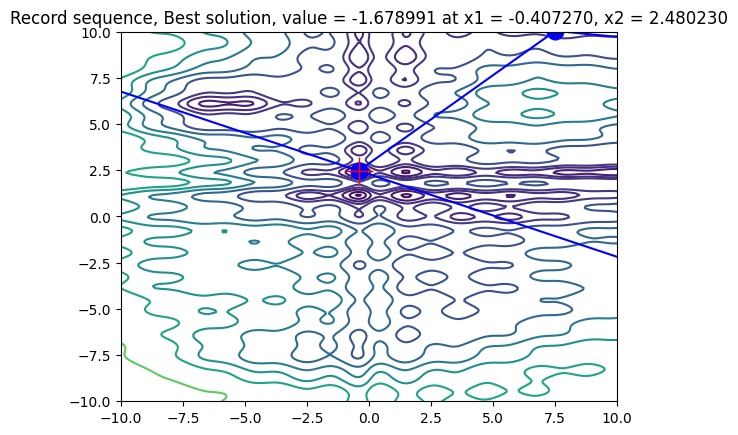


Summary of all runs:
Run 1: Best value = -1.305447 at x1 = 9.687130, x2 = 2.391113
Run 2: Best value = -0.913846 at x1 = 3.092714, x2 = 1.011132
Run 3: Best value = -1.265739 at x1 = 9.690213, x2 = 2.333885
Run 4: Best value = -1.528499 at x1 = 1.365050, x2 = 1.094462
Run 5: Best value = -1.678991 at x1 = -0.407270, x2 = 2.480230


In [99]:
num_of_steps = 2000     # number of steps: do not change
num_of_parameters = 2   # number of solution parameters
N = num_of_parameters

num_runs = 5            # Run the algorithm 5 times

T = 450.0                # Initial temperature (randomness coefficient)
T_min = 0.00001          # Minimum temperature
wT = 0.995               # Cooling factor: change of temperature
c = 0.15                 # Constant affecting acceptance probability

best_solutions = []     # Store best solutions from each run

for run in range(num_runs):

    Solution = np.random.rand(N) * 20 - 10    # initial solution - random point

    E_min = 10e40                             # Reset minimal function value
    E_prev = 0                                # Reset previous function value
    Records = np.empty((0, N))                # Reset array of record solutions

    show_the_point(Solution, "Initial solution (Run " + str(run + 1) + ")")

    T = 450.0                                  # Reset temperature for each run

    for ep in range(num_of_steps):

        SolutionNew = Solution + np.random.randn(N) * (T / 5) * (1 + 0.5 * np.exp(-ep/350)) # new solution (should be near previous one !)

        E = fun3(SolutionNew[0],SolutionNew[1])                 # function value for point coordinates

        dE = E - E_prev                                         # change of function value (dE < 0 means than new solution is better)

        p_accept = min(1, math.exp(-dE / (c * (T + 1e-8))))             # acceptance probability

        if np.random.rand() < p_accept:
            Solution = SolutionNew
            E_prev = E

        if E < E_min:
            print(f"New minimum = {E:.6f} at x1 = {SolutionNew[0]:.6f}, x2 = {SolutionNew[1]:.6f}")
            E_min = E
            Solution_min = SolutionNew
            Records = np.append(Records, [SolutionNew], axis=0)

        T *= wT                                                # temperature changing (can be only after accaptance or in another place)
        if T < T_min:
            T = T_min

    best_solutions.append((E_min, Solution_min[0], Solution_min[1]))

    text = f"Best solution, value = {E_min:.6f} at x1 = {Solution_min[0]:.6f}, x2 = {Solution_min[1]:.6f}"
    print(text)
    show_point_sequence(Records, "Record sequence, " + text)

# Print summary of all runs
print("\nSummary of all runs:")
for i, (E_min, x1, x2) in enumerate(best_solutions):
    print(f"Run {i + 1}: Best value = {E_min:.6f} at x1 = {x1:.6f}, x2 = {x2:.6f}")
